In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
plt.rc('animation', html='jshtml') #something to do with with jupyter notebooks animation

In [12]:
N = 50 #number of points
highlighted_dots = 5
delta_d = 1 #magnitude of DeltaP
steps = 20 #number of iterations in walk

# array storing rms distances at each step
rms_distances = np.zeros(steps + 1)

rms_distances[0] = 0 #walkers start at origin


In [13]:
# coloring and highlighting scatterplot
N_blue = N-highlighted_dots  # number of blue colors
N_red = highlighted_dots    # number of red colors
blue_color = (0, 0, 1)  
red_color = (1, 0, 0)   
colors = [blue_color] * N_blue + [red_color] * N_red

# points in time
""" [[[x11,y11],[x12,y12],[x13,y13],...,[x1steps,y1steps]],
    [[x21,y21],[x22,y22],[x23,y23],...,[x2steps,y2steps]],
    ...
    [[xN1,yN1],[xN2,yN2],...[xNsteps,yNsteps]] ] """
points_in_time = []


[[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


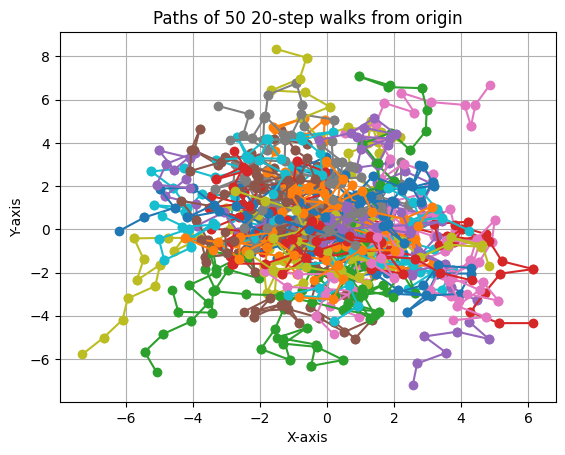

In [14]:
P_start = np.zeros((N,2))
# whatever needs to be done at a particular step
print(P_start)
for step in range(0, steps):
    print(step)
    # array of angles
    low, high = 0, 2*np.pi
    random_number_range = np.random.uniform(low,high)
    angles = np.random.uniform(low,high,N)

    # 2d array of DeltaP at different angles
    cos_values = np.cos(angles)
    sin_values = np.sin(angles)
    DeltaP = np.column_stack((cos_values*delta_d, sin_values*delta_d))
    P_end = P_start + DeltaP
    
    #RMS distance for each step
    distances = np.sqrt(P_end[:, 0]**2+P_end[:, 1]**2)

    #distances of each walker from origin
    rms_distances[step] = np.sqrt(np.mean(distances**2))

    #init list to store positions for the step
    points = []

    # at a particular step, do the stuff to every walker
    for walker in range(N):
        startx = P_start[walker, 0]
        endx = P_end[walker, 0]
        x_values = [startx,endx]
        starty = P_start[walker, 1]
        endy = P_end[walker, 1]
        y_values = [starty,endy]
        plt.plot(x_values, y_values, marker='o')
        points.append([P_end[walker, 0], P_end[walker, 1]])
    
    points_in_time.append(points)

    P_start = P_end

# plot1.png
plt.title(f"Paths of {N} {steps}-step walks from origin")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()  

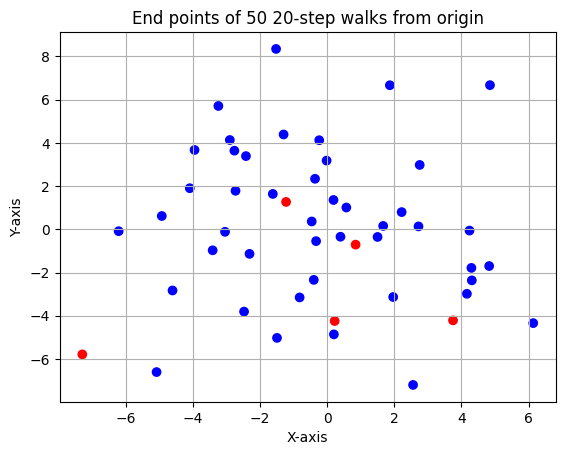

In [15]:
# plot2.png
plt.figure()
plt.scatter(P_end[:,0], P_end[:,1], c = colors, marker='o')
plt.title(f"End points of {N} {steps}-step walks from origin")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()

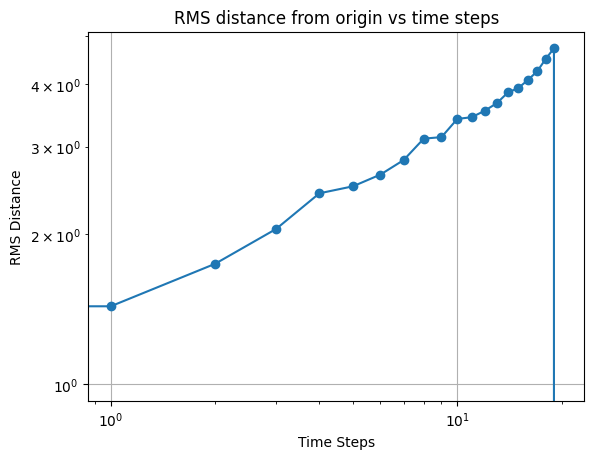

In [16]:
# plot3: RMS distance vs time
plt.figure()
plt.loglog(range(steps + 1), rms_distances, marker='o')
plt.title("RMS distance from origin vs time steps")
plt.xlabel("Time Steps")
plt.ylabel("RMS Distance")
plt.grid(True)
plt.show()

0
20


IndexError: list index out of range

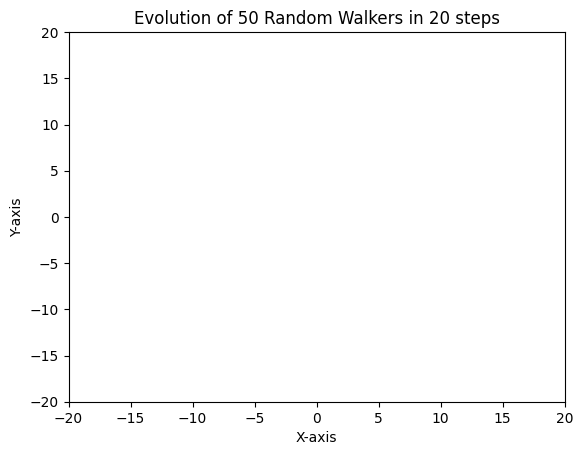

In [19]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
# Create figure for animation
fig, ax = plt.subplots()
ax.set_xlim(-steps, steps)
ax.set_ylim(-steps, steps)
ax.set_title(f"Evolution of {N} Random Walkers in {steps} steps")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")

# Initialize scatter plot without any data
scat = ax.scatter([], [], marker='o')

print(len(points_in_time))
print(len(range(steps)))

# Update function for the animation
def update(frame):
    data = np.array(points_in_time[frame])
    scat.set_offsets(data)
    scat.set_color(colors)
    return [scat]

# Create the animation
anim = FuncAnimation(fig, update, frames=range(steps), interval=100, blit=True)

# Display the animation inline in the notebook
HTML(anim.to_jshtml())